<a href="https://colab.research.google.com/github/jcrylin/RandomForest_AlphaThal/blob/main/google_collab/RanFor_Graphing_GoogleCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import tree
import math

In [ ]:
# reading in simulated text file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_file(filename):
    #count_slash = filename_path.count('/')
    #filename = filename_path.split('/', count_slash)[-1]  # filename is after the last slash
    
    # reads in dataset
    #df = pd.read_csv('/cluster/ifs/projects/AlphaThal/MachineLearning/Features/' + count_slash[-2] + '/' + filename, sep='\t')
    df = pd.read_csv(filename, sep='\t')
    
    # randomly shuffles dataset
    df = df.sample(frac=1)
    
    # drops 'Genotype' column from original dataframe, saves 'x' variables
    df_x = df.drop(['Genotype'], 1)

    # represents actual mutated genotype for each observation, saves 'y' variables
    df_y = df['Genotype'] 

    # grabs coverage for each chromosomal section
    df_column_names = df.columns
    
    # stores the 6 mutation genotypes in a list
    mutated_genotype = df.Genotype.unique()

    return df_x, df_y, df_column_names, mutated_genotype


In [ ]:
def shuffle(df_x, df_y):
    # takes 100 random samples out and stores it
    df_variables_test = df_x[:100]
    df_output_genotype_test = df_y[:100]

    # keeps rest of variables not taken out to train model
    df_variables_train = df_x[100:]
    df_output_genotype_train = df_y[100:]
    
    return df_variables_train, df_variables_test, df_output_genotype_train, df_output_genotype_test
    

In [ ]:
# finds best parameters using GridSearchCV
def grid(df_x, df_y):
    limit = int(math.log2(len(df_x.index)))

    n_trees = [100, 200, 300, 400, 500]
    max_dep = [2, 3, 4, 5, 6, 7, 8, 9, 10]

    if (limit in max_dep) == False:
        for m in max_dep:
            if limit < m:
                max_dep.insert(max_dep.index(m), limit)
                break

    if max_dep[-1] < limit:
        max_dep.append(limit)
    
    
    parameters = {'n_estimators':n_trees, 'max_depth':max_dep}
    
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=2), param_grid=parameters,
                          return_train_score=True, cv=5)
    rf_grid.fit(df_x, df_y)
    
    
    return rf_grid


In [ ]:
# creates list of all best max depths found
def max_depth_graph_axis(rf_grid):
    parameters = rf_grid.cv_results_['params']
    max_depth_list = []
    n_estimators_list = []

    for d in parameters:
        for key, value in d.items():
            if key == 'n_estimators':
                n_estimators_list.append(value)

            if key == 'max_depth':
                if value == None:
                    max_depth_list.append(1000)
                else:
                    max_depth_list.append(value)
    
    return max_depth_list

In [ ]:
# reads in all files

#read_file1 = read_file('/cluster/ifs/projects/AlphaThal/MachineLearning/Features/DataSet1/DataSet1.cvg10.insert400.stdev20.chm13.txt')
read_file1 = read_file('/content/drive/My Drive/DataSet1.cvg10.insert400.stdev20.chm13.txt')
shuffle1 = shuffle(read_file1[0], read_file1[1])
grid1 = grid(shuffle1[0], shuffle1[2])
max_depth_graph_axis1 = max_depth_graph_axis(grid1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
#read_file2 = read_file('/cluster/ifs/projects/AlphaThal/MachineLearning/Features/DataSet1/DataSet1.cvg20.insert400.stdev20.chm13.txt')
read_file2 = read_file('/content/drive/My Drive/DataSet1.cvg20.insert400.stdev20.chm13.txt')
shuffle2 = shuffle(read_file2[0], read_file2[1])
grid2 = grid(shuffle2[0], shuffle2[2])
max_depth_graph_axis2 = max_depth_graph_axis(grid2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
#read_file3 = read_file('/cluster/ifs/projects/AlphaThal/MachineLearning/Features/DataSet2/DataSet2.cvg10.insert440.stdev100.hg19.txt')
read_file3 = read_file('/content/drive/My Drive/DataSet2.cvg10.insert440.stdev100.hg19.txt')
shuffle3 = shuffle(read_file3[0], read_file3[1])
grid3 = grid(shuffle3[0], shuffle3[2])
max_depth_graph_axis3 = max_depth_graph_axis(grid3)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
#read_file4 = read_file('/cluster/ifs/projects/AlphaThal/MachineLearning/Features/DataSet2/DataSet2.cvg20.insert440.stdev100.hg19.txt')
read_file4 = read_file('/content/drive/My Drive/DataSet2.cvg20.insert440.stdev100.hg19.txt')
shuffle4 = shuffle(read_file4[0], read_file4[1])
grid4 = grid(shuffle4[0], shuffle4[2])
max_depth_graph_axis4 = max_depth_graph_axis(grid4)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file5 = read_file('/content/drive/My Drive/DataSet2.11760samples.cvg10.insert440.stdev100.hg19.txt')
shuffle5 = shuffle(read_file5[0], read_file5[1])
grid5 = grid(shuffle5[0], shuffle5[2])
max_depth_graph_axis5 = max_depth_graph_axis(grid5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:

read_file6 = read_file('/content/drive/My Drive/DataSet2.11760samples.cvg20.insert440.stdev100.hg19.txt')
shuffle6 = shuffle(read_file6[0], read_file6[1])
grid6 = grid(shuffle6[0], shuffle6[2])
max_depth_graph_axis6 = max_depth_graph_axis(grid6)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file7 = read_file('/content/drive/My Drive/DataSet2.11760samples.cvg30.insert440.stdev100.hg19.txt')
shuffle7 = shuffle(read_file7[0], read_file7[1])
grid7 = grid(shuffle7[0], shuffle7[2])
max_depth_graph_axis7 = max_depth_graph_axis(grid7)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file8 = read_file('/content/drive/My Drive/DataSet2.11760samples.cvg40.insert440.stdev100.hg19.txt')
shuffle8 = shuffle(read_file8[0], read_file8[1])
grid8 = grid(shuffle8[0], shuffle8[2])
max_depth_graph_axis8 = max_depth_graph_axis(grid8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file9 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg10.insert440.stdev100.chm13.txt')
shuffle9 = shuffle(read_file9[0], read_file9[1])
grid9 = grid(shuffle9[0], shuffle9[2])
max_depth_graph_axis9 = max_depth_graph_axis(grid9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file10 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg20.insert440.stdev100.chm13.txt')
shuffle10 = shuffle(read_file10[0], read_file10[1])
grid10 = grid(shuffle10[0], shuffle10[2])
max_depth_graph_axis10 = max_depth_graph_axis(grid10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file11 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg30.insert440.stdev100.chm13.txt')
shuffle11 = shuffle(read_file11[0], read_file11[1])
grid11 = grid(shuffle11[0], shuffle11[2])
max_depth_graph_axis11 = max_depth_graph_axis(grid11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file12 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg40.insert440.stdev100.chm13.txt')
shuffle12 = shuffle(read_file12[0], read_file12[1])
grid12 = grid(shuffle12[0], shuffle12[2])
max_depth_graph_axis12 = max_depth_graph_axis(grid12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [ ]:
read_file13 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg10.insert440.stdev100.hg19.txt')
shuffle13 = shuffle(read_file13[0], read_file13[1])
grid13 = grid(shuffle13[0], shuffle13[2])
max_depth_graph_axis13 = max_depth_graph_axis(grid13)

In [ ]:
read_file14 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg20.insert440.stdev100.hg19.txt')
shuffle14 = shuffle(read_file14[0], read_file14[1])
grid14 = grid(shuffle14[0], shuffle14[2])
max_depth_graph_axis14 = max_depth_graph_axis(grid14)

In [ ]:
read_file15 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg30.insert440.stdev100.hg19.txt')
shuffle15 = shuffle(read_file15[0], read_file15[1])
grid15 = grid(shuffle15[0], shuffle15[2])
max_depth_graph_axis15 = max_depth_graph_axis(grid15)

In [ ]:
read_file16 = read_file('/content/drive/My Drive/DataSet2.5880samples.cvg40.insert440.stdev100.hg19.txt')
shuffle16 = shuffle(read_file16[0], read_file16[1])
grid16 = grid(shuffle16[0], shuffle16[2])
max_depth_graph_axis16 = max_depth_graph_axis(grid16)

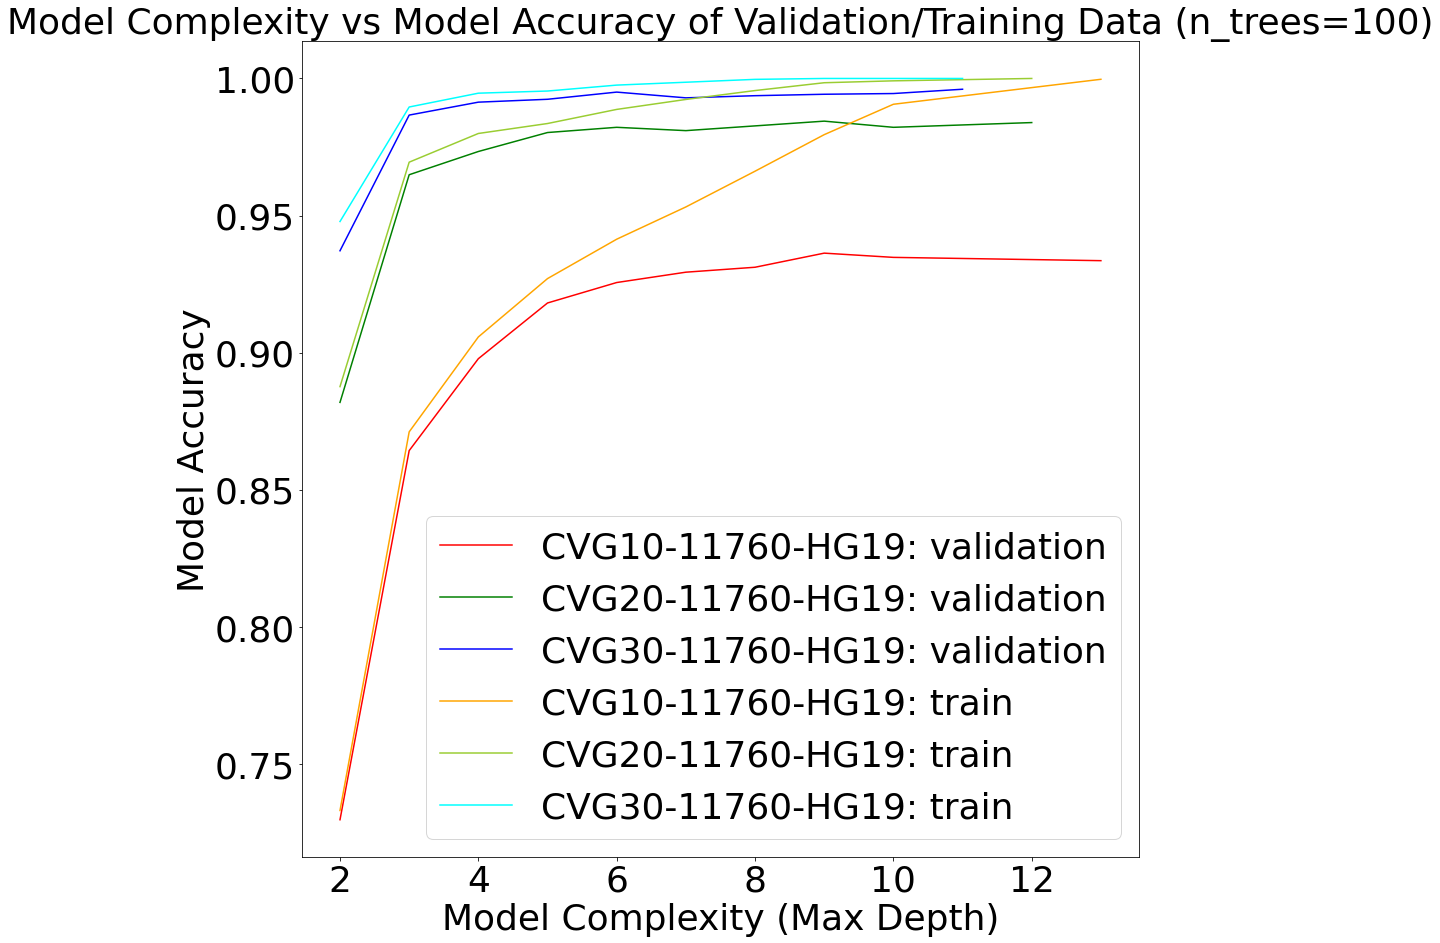

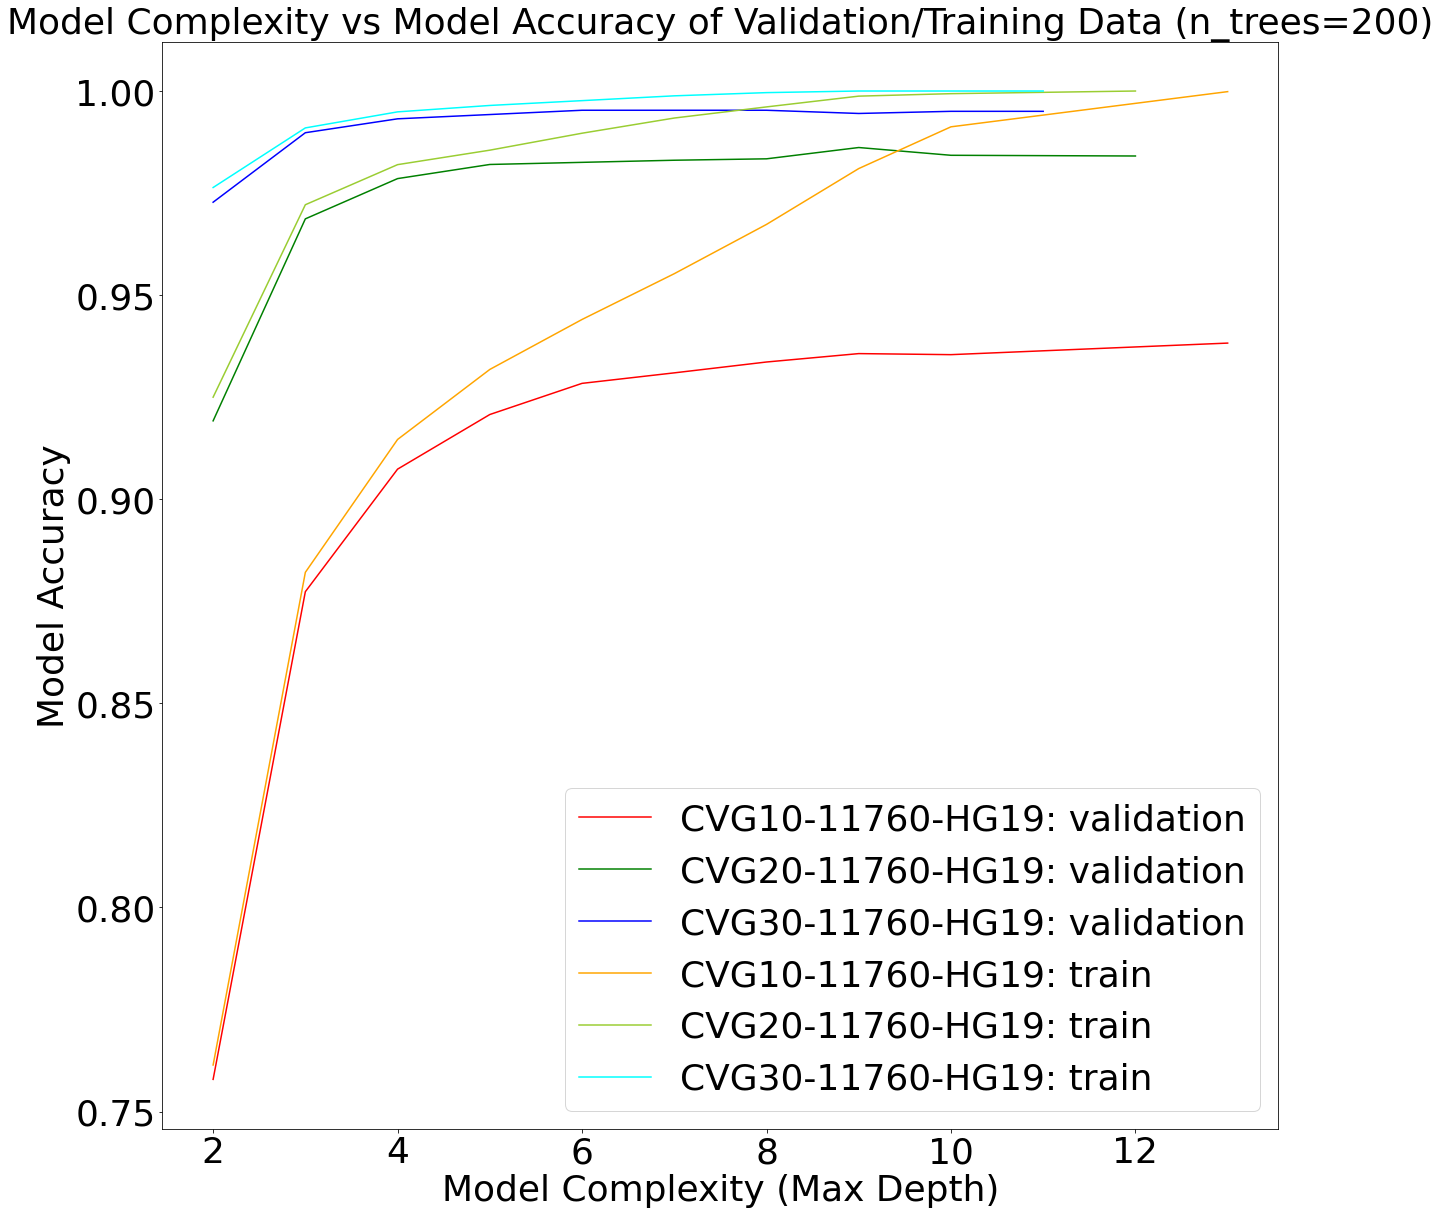

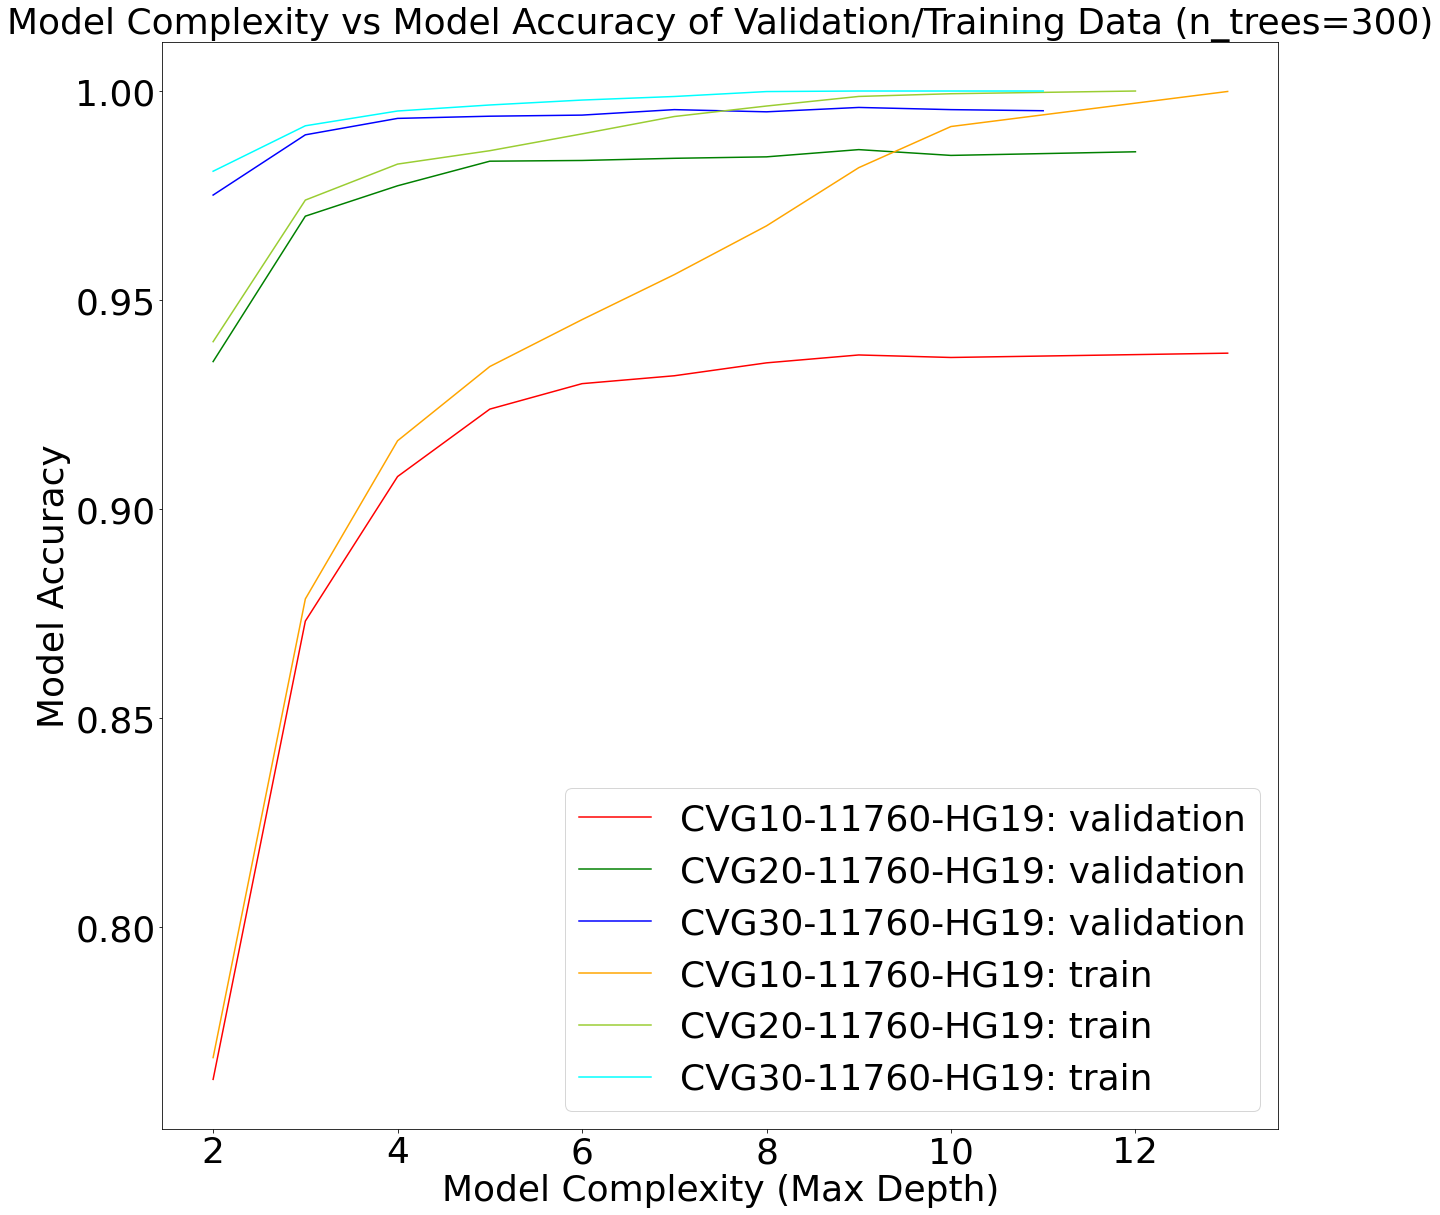

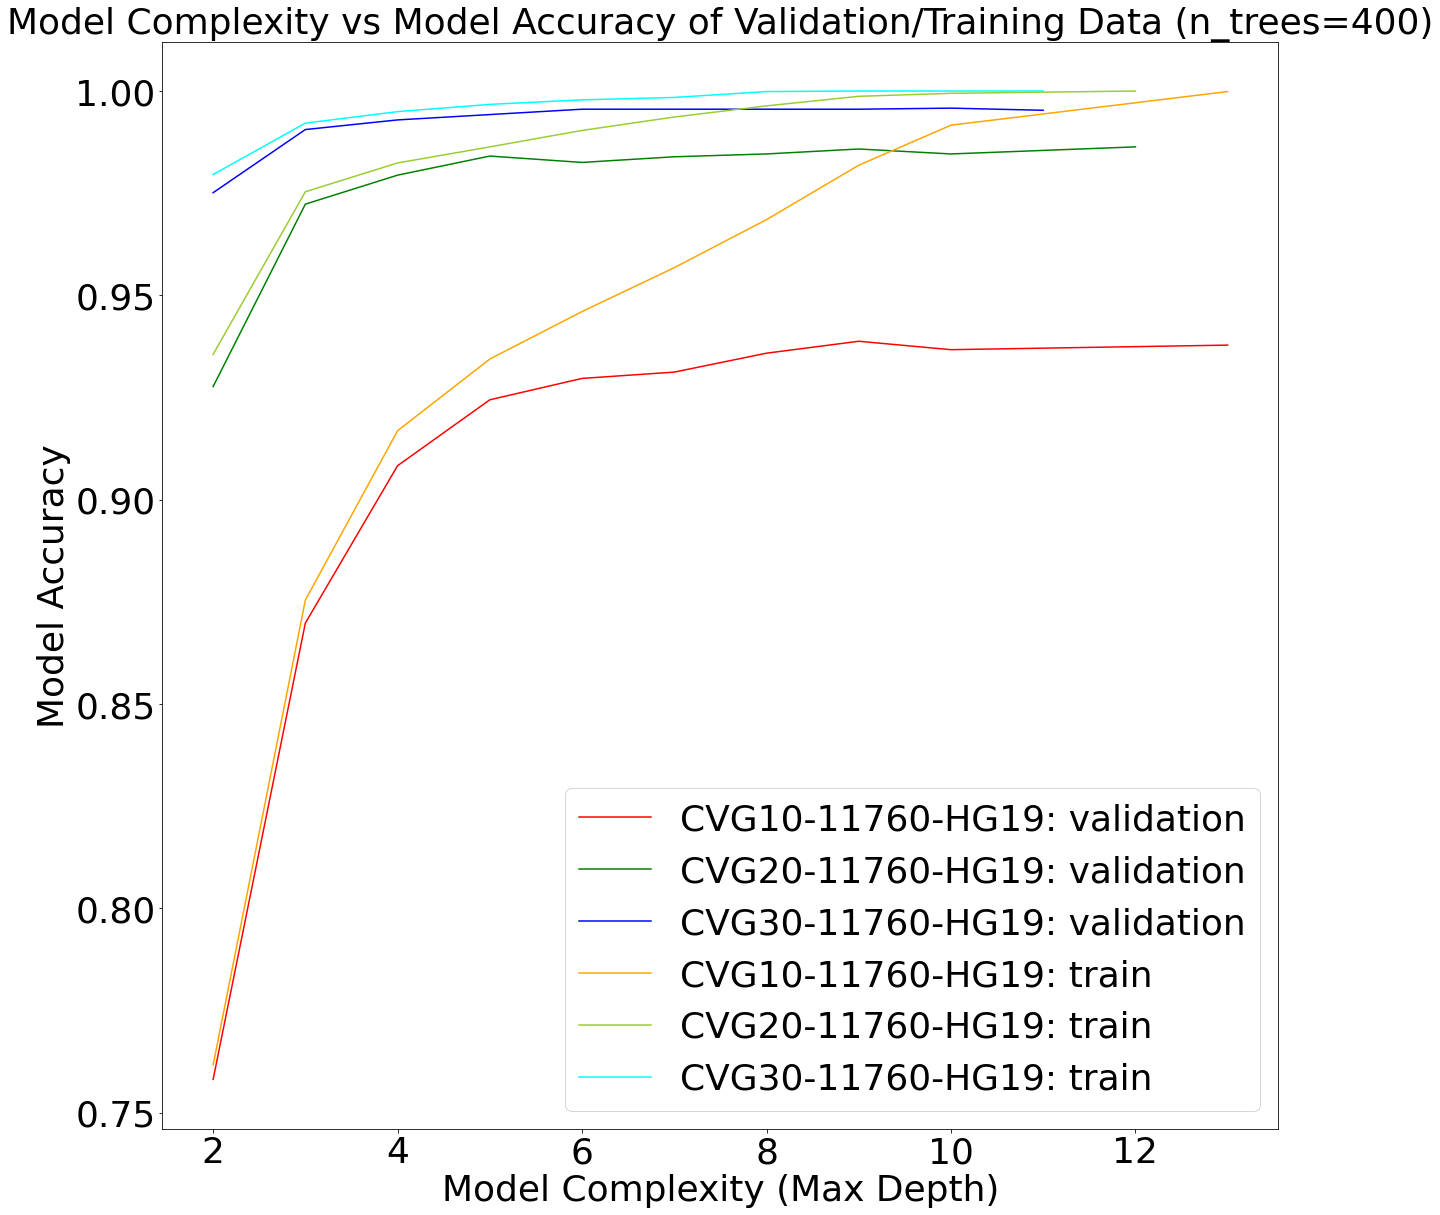

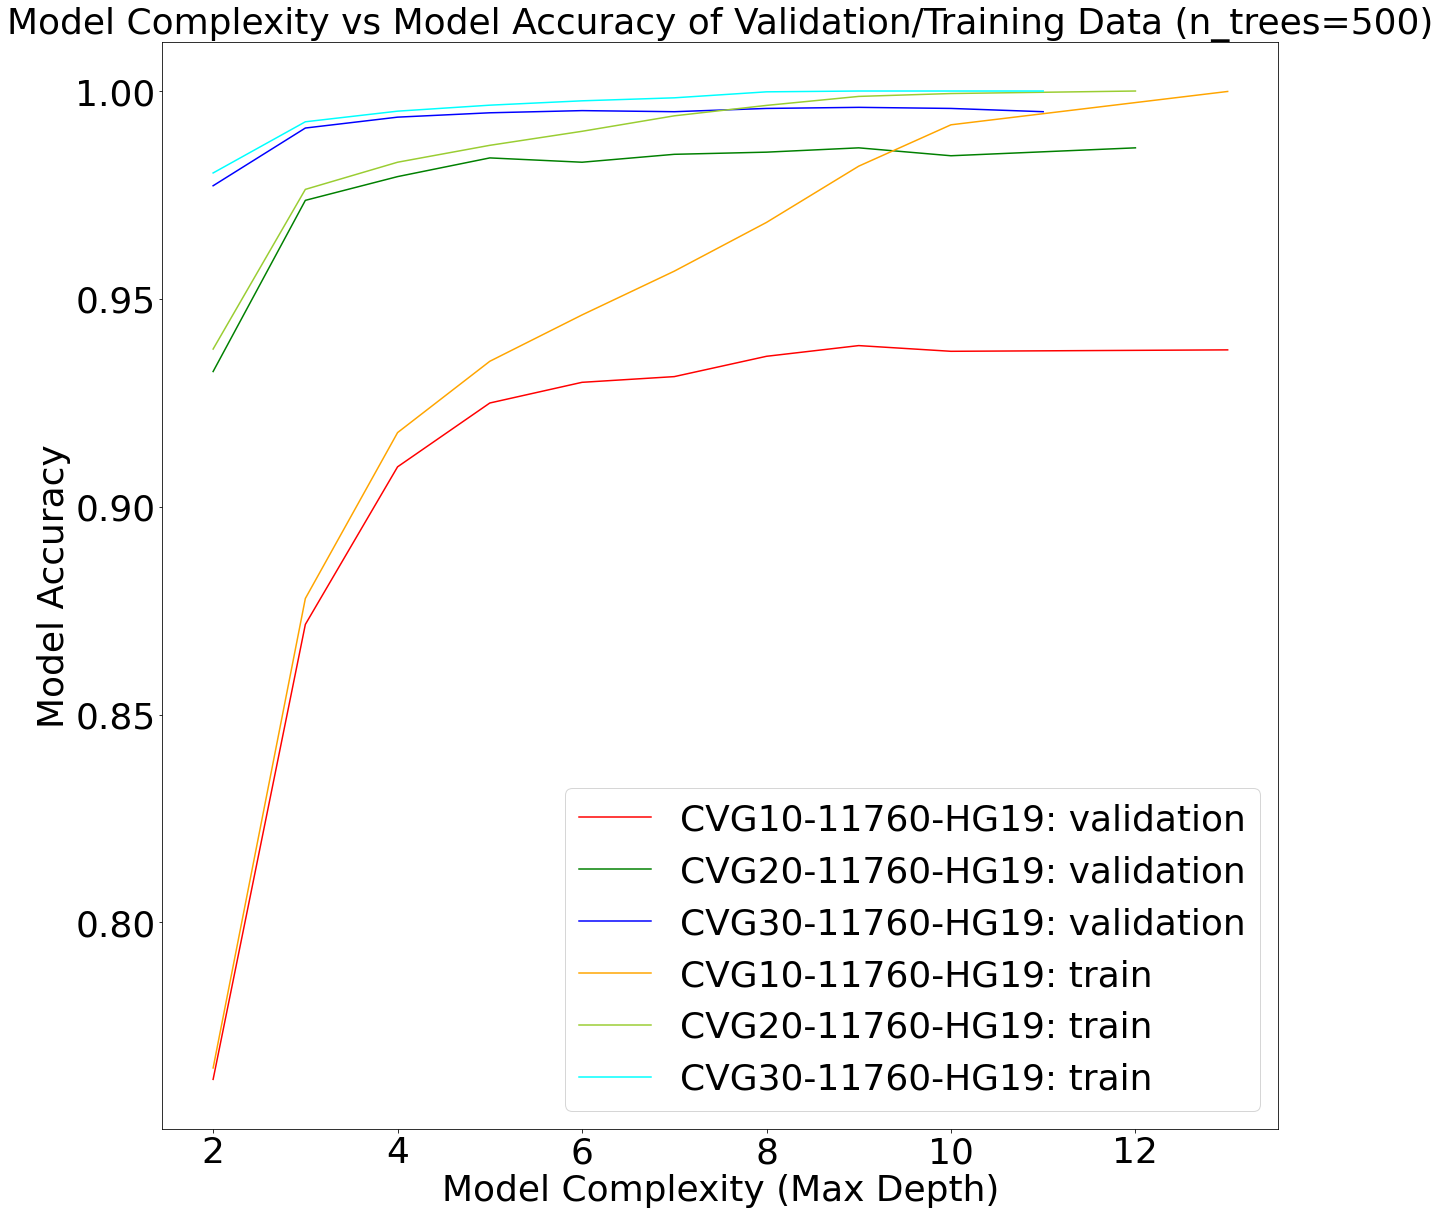

In [ ]:
# graphing model complexity vs accuracy graphs
# all data points from dataset2

for n in range(5):
    x_model_complexity1 = []
    y_test_score1 = []
    y_train_score1 = []

    x_model_complexity2 = []
    y_test_score2 = []
    y_train_score2 = []

    x_model_complexity3 = []
    y_test_score3 = []
    y_train_score3 = []

    x_model_complexity4 = []
    y_test_score4 = []
    y_train_score4 = []

    x_model_complexity5 = []
    y_test_score5 = []
    y_train_score5 = []

    x_model_complexity6 = []
    y_test_score6 = []
    y_train_score6 = []

    x_model_complexity7 = []
    y_test_score7 = []
    y_train_score7 = []

    x_model_complexity8 = []
    y_test_score8 = []
    y_train_score8 = []


    for i in range(len(max_depth_graph_axis5)):  # finds max_depth when n=500
        if i % 5 == n:
            #x_model_complexity1.append(max_depth_graph_axis1[i])
            #y_test_score1.append(grid1.cv_results_['mean_test_score'][i])
            #y_train_score1.append(grid1.cv_results_['mean_train_score'][i])

            #x_model_complexity2.append(max_depth_graph_axis2[i])
            #y_test_score2.append(grid2.cv_results_['mean_test_score'][i])
            #y_train_score2.append(grid2.cv_results_['mean_train_score'][i])

            #x_model_complexity3.append(max_depth_graph_axis3[i])
            #y_test_score3.append(grid3.cv_results_['mean_test_score'][i])
            #y_train_score3.append(grid3.cv_results_['mean_train_score'][i])

            #x_model_complexity4.append(max_depth_graph_axis4[i])
            #y_test_score4.append(grid4.cv_results_['mean_test_score'][i])
            #y_train_score4.append(grid4.cv_results_['mean_train_score'][i])

            x_model_complexity5.append(max_depth_graph_axis5[i])
            y_test_score5.append(grid5.cv_results_['mean_test_score'][i])
            y_train_score5.append(grid5.cv_results_['mean_train_score'][i])

            x_model_complexity6.append(max_depth_graph_axis6[i])
            y_test_score6.append(grid6.cv_results_['mean_test_score'][i])
            y_train_score6.append(grid6.cv_results_['mean_train_score'][i])

            x_model_complexity7.append(max_depth_graph_axis7[i])
            y_test_score7.append(grid7.cv_results_['mean_test_score'][i])
            y_train_score7.append(grid7.cv_results_['mean_train_score'][i])

            x_model_complexity8.append(max_depth_graph_axis8[i])
            y_test_score8.append(grid8.cv_results_['mean_test_score'][i])
            y_train_score8.append(grid8.cv_results_['mean_train_score'][i])



    plt.figure()
    plt.rcParams['figure.figsize'] = [20, 20]
    #plt.plot(x_model_complexity3, y_test_score3, label='CVG10-5880-HG19: validation')
    #plt.plot(x_model_complexity4, y_test_score4, label='CVG20-5880-HG19: validation')
    plt.plot(x_model_complexity5, y_test_score5, label='CVG10-11760-HG19: validation', color='red')
    plt.plot(x_model_complexity6, y_test_score6, label='CVG20-11760-HG19: validation', color='green')
    plt.plot(x_model_complexity7, y_test_score7, label='CVG30-11760-HG19: validation', color='blue')
    #plt.plot(x_model_complexity8, y_test_score8, label='CVG40-11760-HG19: validation')

    #plt.plot(x_model_complexity3, y_train_score3, label='CVG10-5880-HG19: train')
    #plt.plot(x_model_complexity4, y_train_score4, label='CVG20-5880-HG19: train')
    plt.plot(x_model_complexity5, y_train_score5, label='CVG10-11760-HG19: train', color='orange')
    plt.plot(x_model_complexity6, y_train_score6, label='CVG20-11760-HG19: train', color='yellowgreen')
    plt.plot(x_model_complexity7, y_train_score7, label='CVG30-11760-HG19: train', color='cyan')
    #plt.plot(x_model_complexity8, y_train_score8, label='CVG40-11760-HG19: train')

    plt.title('Model Complexity vs Model Accuracy of Validation/Training Data (n_trees={})'.format((n+1)*100), fontsize=36)
    plt.tick_params(axis='both', which='major', labelsize=36)
    plt.xlabel('Model Complexity (Max Depth)', fontsize=36)
    plt.ylabel('Model Accuracy', fontsize=36)
    plt.legend(fontsize=36)
    plt.savefig('score_graph_' + str(n+1))



In [ ]:
# displays a tree from the random forest model

# tutorials used
### https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
### https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c   
### https://mljar.com/blog/visualize-decision-tree/
### https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

# just picking out best random forest from random text file, also pick out first tree in forest
best_random_forest = grid5.best_estimator_
random_tree = best_random_forest.estimators_[0]

diagram = plt.figure(figsize=(100,100), dpi=200)
tree.plot_tree(random_tree, max_depth=2, feature_names=read_file5[2], 
                         class_names=read_file5[3], filled=True, fontsize=80)

plt.show()
diagram.savefig("decistion_tree.png")


In [ ]:
best_params1 = grid1.best_params_
best_params2 = grid2.best_params_
best_params3 = grid3.best_params_
best_params4 = grid4.best_params_


In [ ]:
best_params5 = grid5.best_params_
best_params6 = grid6.best_params_
best_params7 = grid7.best_params_
best_params8 = grid8.best_params_

In [ ]:
best_params9 = grid9.best_params_
best_params10 = grid10.best_params_
best_params11 = grid11.best_params_
best_params12 = grid12.best_params_


In [ ]:
best_params13 = grid13.best_params_
best_params14 = grid14.best_params_
best_params15 = grid15.best_params_
best_params16 = grid16.best_params_

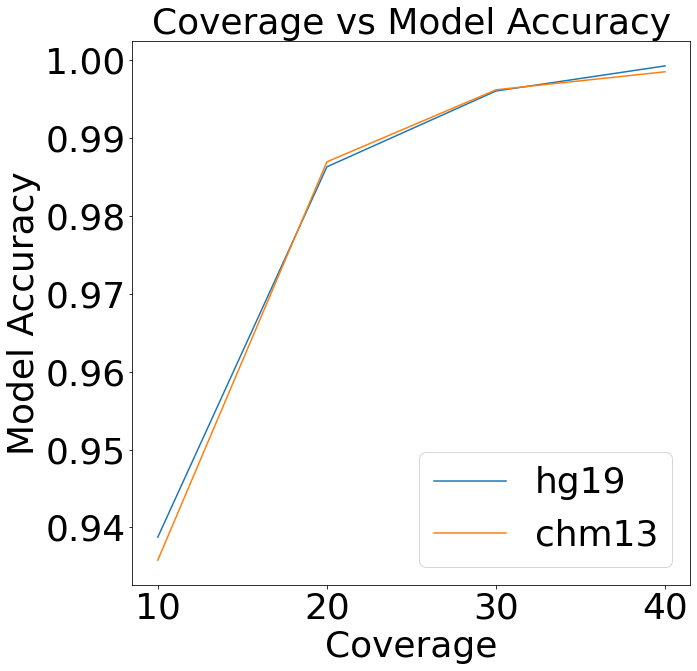

In [ ]:
# creates coverage vs model accuracy graph

x_coverage19 = np.linspace(10,40,4, dtype=int)  # grabs coverage at 10x, 20x, 30x, and 40x
x_coverage13 = np.linspace(10,40,4, dtype=int)
y_accuracy19 = []
y_accuracy13 = []

y_accuracy19.append(grid5.cv_results_['mean_test_score'][grid5.cv_results_['params'].index(best_params5)])
y_accuracy19.append(grid6.cv_results_['mean_test_score'][grid6.cv_results_['params'].index(best_params6)])
y_accuracy19.append(grid7.cv_results_['mean_test_score'][grid7.cv_results_['params'].index(best_params7)])
y_accuracy19.append(grid8.cv_results_['mean_test_score'][grid8.cv_results_['params'].index(best_params8)])

y_accuracy13.append(grid9.cv_results_['mean_test_score'][grid9.cv_results_['params'].index(best_params9)])
y_accuracy13.append(grid10.cv_results_['mean_test_score'][grid10.cv_results_['params'].index(best_params10)])
y_accuracy13.append(grid11.cv_results_['mean_test_score'][grid11.cv_results_['params'].index(best_params11)])
y_accuracy13.append(grid12.cv_results_['mean_test_score'][grid12.cv_results_['params'].index(best_params12)])
  
plt.figure()
plt.rcParams['figure.figsize'] = [30, 30]
plt.plot(x_coverage19, y_accuracy19, label='hg19')  # data only from dataset2
plt.plot(x_coverage13, y_accuracy13, label='chm13')  # data only from dataset2
plt.title('Coverage vs Model Accuracy', fontsize=36)
plt.tick_params(axis='both', which='major', labelsize=36)
plt.xlabel('Coverage', fontsize=36)
plt.ylabel('Model Accuracy', fontsize=36)
plt.legend(fontsize=36)
plt.savefig('coverage_score_graph')